# Бинарная классификация

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy  as np

## Загрузка и ознакомление с данными

In [33]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [34]:
data.data, data.data.shape

(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 (569, 30))

In [35]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [36]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [37]:
pd.Series(data.target).value_counts()

1    357
0    212
dtype: int64

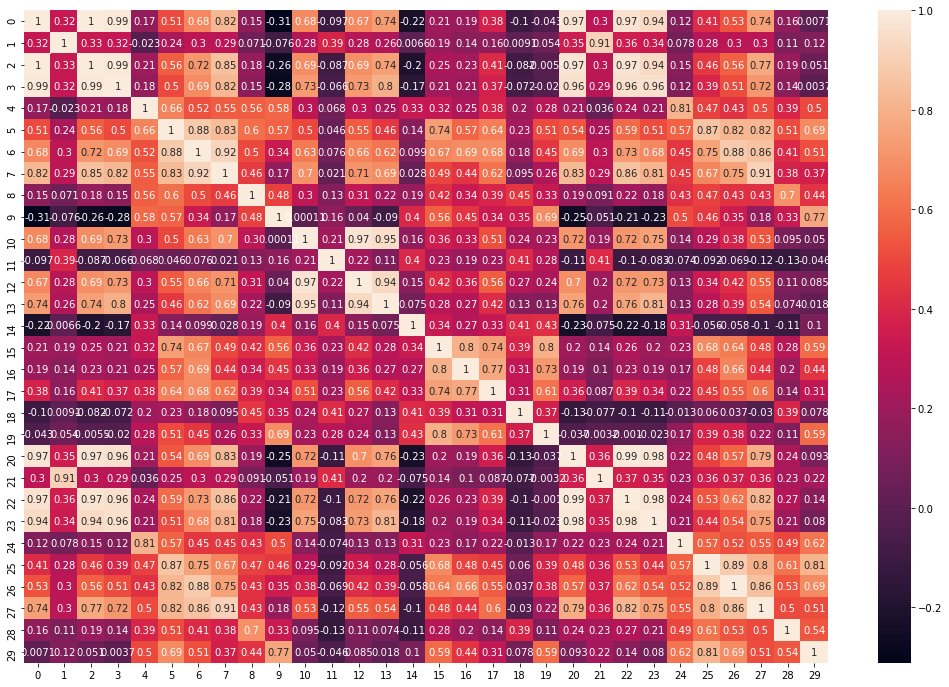

In [38]:
# построив корреляционную матрицу, видим, что имеются сильно скоррелтрованные переменные-предикторы
correlation_matrix = pd.DataFrame(data.data).corr()
plt.figure(figsize=(18,12))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [39]:
# из набора сильно скоррелированные переменных можно оставить только одну. 
correlation_matrix

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
1,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
2,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
3,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
4,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
5,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
6,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
7,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
8,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
9,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [40]:

def plot_feature_in_dataframe(dataframe, feature):
    yy = dataframe[feature]
    sns.distplot(yy, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label = feature)
    plt.title(feature)
    plt.show()    
    
    
    
def plot_feature_in_array(array, feature_number):
    yy = array[:, feature_number]
    label = f"Feature #{feature_number}"
    sns.distplot(yy, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label = label)
    plt.title(label)
    plt.show()    
    

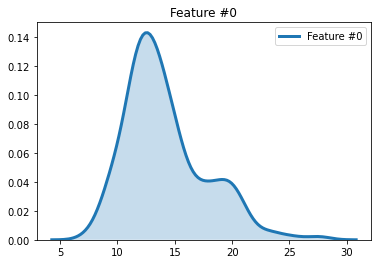

In [41]:
plot_feature_in_array(data.data, 0)

## Построение модели

In [42]:
from sklearn.tree import (DecisionTreeClassifier, export_graphviz)
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.25)
len(X_train), len(X_test), len(data.data)

(426, 143, 569)

In [44]:
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(X_train, y_train)

# print("Max Depth: {0}".format(max_depth))
print("Training Accuracy: {0:.2f}".format(tree.score(X_train, y_train)))
print("Testing Accuracy: {0:.2f}".format(tree.score(X_test, y_test)))

Training Accuracy: 0.97
Testing Accuracy: 0.92


In [45]:
y_predict_proba = tree.predict_proba(X_test)
y_predict = tree.predict(X_test)

In [46]:
y_predict_proba   # вероятности исхода №0 и №1 соответсвенно 

array([[0.9924812 , 0.0075188 ],
       [0.0083682 , 0.9916318 ],
       [0.0083682 , 0.9916318 ],
       [0.0083682 , 0.9916318 ],
       [0.0083682 , 0.9916318 ],
       [0.95      , 0.05      ],
       [0.9924812 , 0.0075188 ],
       [0.0083682 , 0.9916318 ],
       [0.9924812 , 0.0075188 ],
       [0.0083682 , 0.9916318 ],
       [0.0083682 , 0.9916318 ],
       [0.0083682 , 0.9916318 ],
       [0.9924812 , 0.0075188 ],
       [0.0083682 , 0.9916318 ],
       [0.0083682 , 0.9916318 ],
       [0.0083682 , 0.9916318 ],
       [0.9924812 , 0.0075188 ],
       [0.0083682 , 0.9916318 ],
       [0.0083682 , 0.9916318 ],
       [0.0083682 , 0.9916318 ],
       [0.0083682 , 0.9916318 ],
       [0.0083682 , 0.9916318 ],
       [0.0083682 , 0.9916318 ],
       [0.5       , 0.5       ],
       [0.95      , 0.05      ],
       [0.9924812 , 0.0075188 ],
       [0.9924812 , 0.0075188 ],
       [0.0083682 , 0.9916318 ],
       [0.0083682 , 0.9916318 ],
       [0.9924812 , 0.0075188 ],
       [0.

In [47]:
y_predict

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0])

## Оценка качества модели

Ошибки первого (ложная тревога) и второго рода (пропуск цели):

https://ru.wikipedia.org/wiki/%D0%9E%D1%88%D0%B8%D0%B1%D0%BA%D0%B8_%D0%BF%D0%B5%D1%80%D0%B2%D0%BE%D0%B3%D0%BE_%D0%B8_%D0%B2%D1%82%D0%BE%D1%80%D0%BE%D0%B3%D0%BE_%D1%80%D0%BE%D0%B4%D0%B0

ROC-кривая:

https://ru.wikipedia.org/wiki/ROC-%D0%BA%D1%80%D0%B8%D0%B2%D0%B0%D1%8F

In [48]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
import itertools

In [49]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if len(classes) == 2:
        TN_cnt = cm[0,0]
        FP_cnt = cm[0,1]
        FN_cnt = cm[1,0]
        TP_cnt = cm[1,1]
        print(TN_cnt, FP_cnt, FN_cnt, TP_cnt)
        
        FPR = FP_cnt / (FP_cnt + TN_cnt)
        TPR = TP_cnt / (TP_cnt + FN_cnt)
        print("False Positive Rate, FPR = FP/N = FP/(FP+TN):", round(FPR,3))
        print("True Positive Rate, TPR = TP/P = TP/(TP+FN):", round(TPR,3))
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')




In [50]:
cm = confusion_matrix(y_true=y_test, y_pred=y_predict, labels=[0, 1])
cm

array([[46,  4],
       [ 8, 85]])

46 4 8 85
False Positive Rate, FPR = FP/N = FP/(FP+TN): 0.08
True Positive Rate, TPR = TP/P = TP/(TP+FN): 0.914
Confusion matrix, without normalization
[[46  4]
 [ 8 85]]


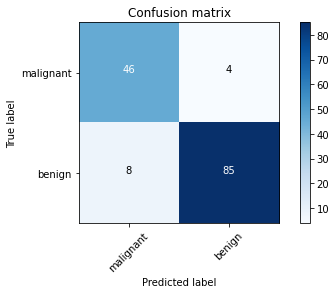

In [51]:
plot_confusion_matrix(cm, classes= data.target_names)

46 4 8 85
False Positive Rate, FPR = FP/N = FP/(FP+TN): 0.08
True Positive Rate, TPR = TP/P = TP/(TP+FN): 0.914
Normalized confusion matrix
[[0.92       0.08      ]
 [0.08602151 0.91397849]]


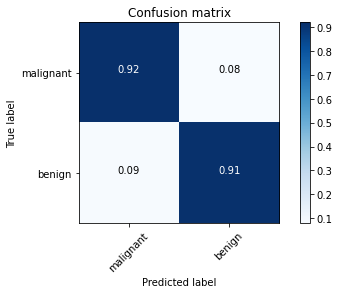

In [52]:
plot_confusion_matrix(cm, classes= data.target_names, normalize=True)

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict_proba[:,1])


In [54]:
def plot_roc_curve(fpr, tpr, lw):
    area = auc(fpr, tpr)
    # plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {area})')
    # plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {area})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    

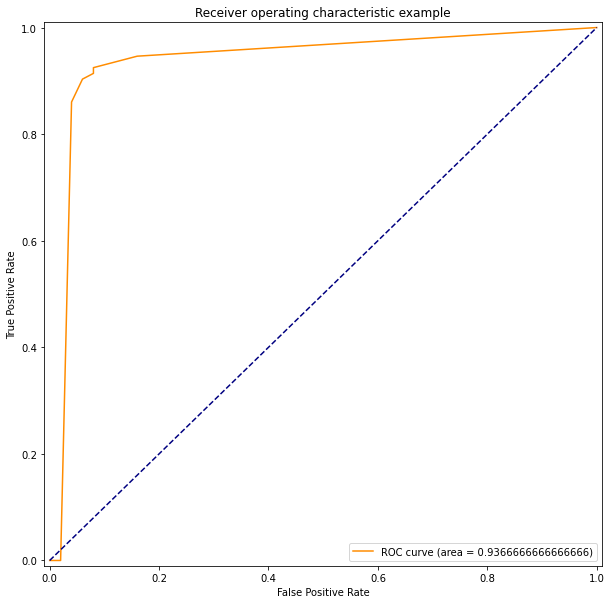

In [55]:
plt.figure(figsize=(10,10))
plot_roc_curve(fpr, tpr, lw=data.target_names)
plt.show()

In [56]:
thresholds

array([2.        , 1.        , 0.9916318 , 0.8       , 0.69230769,
       0.5       , 0.05      , 0.0075188 ])